<h3>In deze notebook gaan we verschillende dingen doen met de Fitbit dataset die we hebben gekregen van de docenten.</h3>
<h3>Ik zal verschillende stappen tussendoor uitleggen en proberen een conclusie te trekken uit de dataset.</h3>

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

<h3> Laat de datasets</h3>

In [158]:
df_survey = pd.read_csv("survey.csv")
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


<h3> We moeten de seperator parameter veranderen naar ; omdat het bestand niet , verdeelt is.</h3>

In [159]:
df_steps = pd.read_csv("steps.csv", sep=";")
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3> Merge de twee datasets op "id"</h3>

In [160]:
df = pd.merge(df_steps, df_survey, on = "id")
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


<h3> vul alle NaN velden met 0,
verweider onmogelijke waardes in "weight",
Haal alle NaN weg</h3>

In [161]:
df = df.fillna(0)
def remove_impossible_weights(x):
    if(x <= 40 or x >= 200): 
        return float("NaN")
    else: 
        return x
df["weight"] = df["weight"].apply(remove_impossible_weights)
df = df.dropna()

print(df["weight"].max())
print(df["weight"].min())

155.0
45.0


<h3> Maak variable variable mean_steps</h3>

In [162]:
col = df.loc[: , "20-6-2013":"13-5-2014"]
df["mean_steps"] = col.mean(axis=1)
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean_steps
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


In [163]:
def remove_impossible_mean_steps(x):
    if(x <= 100 or x >= 15000): 
        return float("NaN")
    else: 
        return x
df["mean_steps"] = df["mean_steps"].apply(remove_impossible_mean_steps)
df = df.dropna()

print(df["mean_steps"].max())
print(df["mean_steps"].min())

14538.682926829268
100.28658536585365


<h3>Maak een subset van alle data zonder de dagen erbij.</h3>

In [164]:
df_subset = df[["city", "gender", "age", "education", "education_1", "height", "weight", "mean_steps"]]
df_subset.head()

,city,gender,age,education,education_1,height,weight,mean_steps
0,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,5133.875000
1,Lille,Male,35-44,3,Bachelor,180.0,77.0,2826.371951
2,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,3745.902439
3,Lyon,Male,<25,1,Bachelor,178.0,80.0,221.536585
4,Montpellier,Female,25-34,4,Bachelor,167.0,61.0,874.557927


<h3>Bereken gender string naar getal</h3>

In [165]:
def calc_gender_number(x):
    if(x == "Male"): 
        return 0
    elif(x == "Female"): 
        return 1
df_subset["gender_number"] = df["gender"].apply(calc_gender_number)

<ipython-input-165-5750cbf439bf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["gender_number"] = df["gender"].apply(calc_gender_number)


<h3>Bereken age string naar getal</h3>

In [166]:
def calc_age_numbers(x):
    if(x == "<25"): 
        return 0
    elif(x == "25-34"): 
        return 1
    elif(x == "35-44"): 
        return 2
    elif(x == "45-54"): 
        return 3
    elif(x == "55-64"): 
        return 4
    elif(x == "65+"): 
        return 5
df_subset["age_number"] = df["age"].apply(calc_age_numbers)
df_subset.head()

<ipython-input-166-c85a27907864>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["age_number"] = df["age"].apply(calc_age_numbers)


,city,gender,age,education,education_1,height,weight,mean_steps,gender_number,age_number
0,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,5133.875000,0,1
1,Lille,Male,35-44,3,Bachelor,180.0,77.0,2826.371951,0,2
2,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,3745.902439,0,1
3,Lyon,Male,<25,1,Bachelor,178.0,80.0,221.536585,0,0
4,Montpellier,Female,25-34,4,Bachelor,167.0,61.0,874.557927,1,1


<h3>Zoals hier onder te zien is zien we niet direct een verband tussen variablenen.</h3>

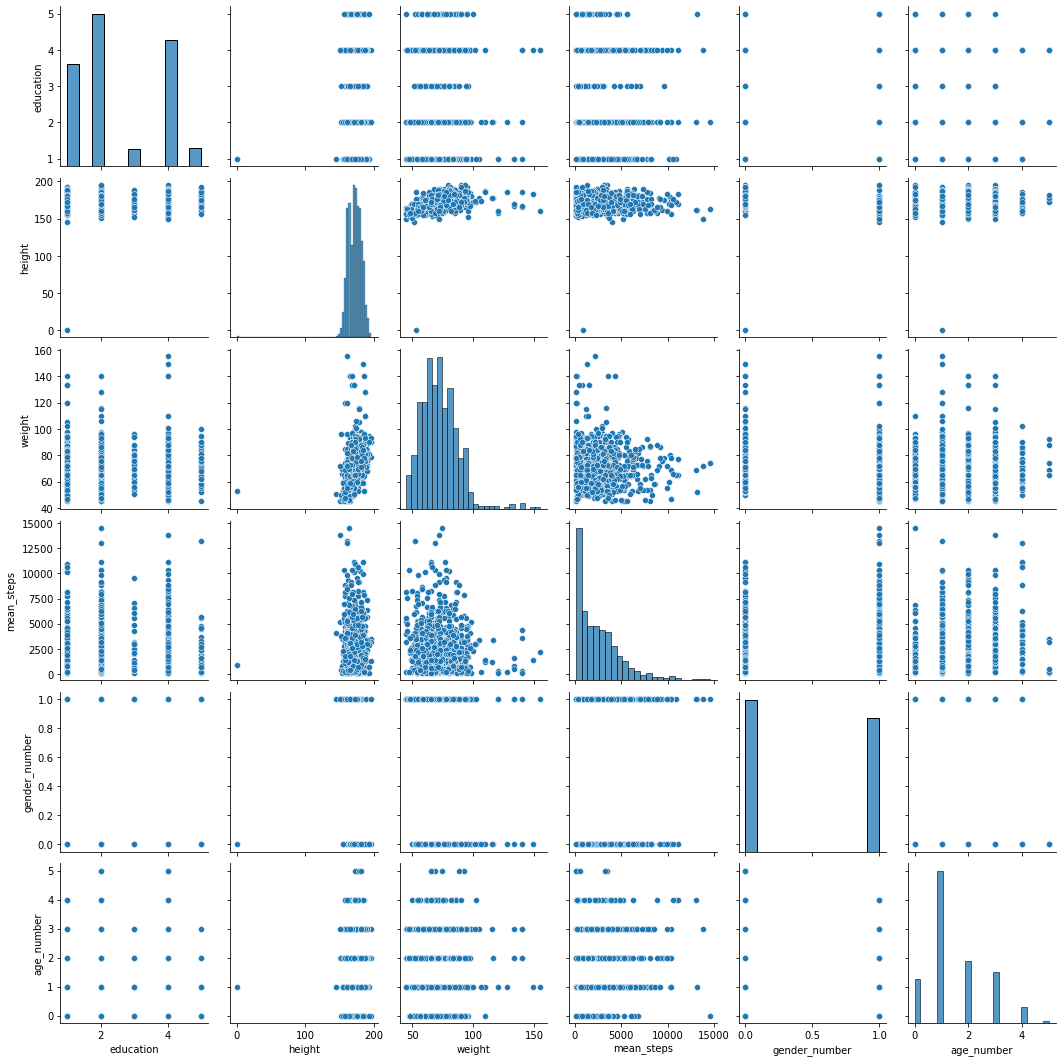

In [167]:
sns.pairplot(df_subset)
plt.show()

<h3>Ook in de onderste tabel is er geen verband te zien tussen bepaalde waardes.</h3>
<h3>Het variable met het hoogste verband is "age" maar deze is nog steeds zo laag dat je het eigenlijk niet een echt verband kan noemen.</h3>

In [168]:
df_subset.corr()

,education,height,weight,mean_steps,gender_number,age_number
education,1.000000,0.003266,0.008118,0.012337,0.001230,0.091982
height,0.003266,1.000000,0.436988,-0.042301,-0.575966,-0.065751
weight,0.008118,0.436988,1.000000,-0.086138,-0.405581,0.030227
mean_steps,0.012337,-0.042301,-0.086138,1.000000,0.045646,0.172936
gender_number,0.001230,-0.575966,-0.405581,0.045646,1.000000,0.051790
age_number,0.091982,-0.065751,0.030227,0.172936,0.051790,1.000000


<h3>Hier onder gaan we linear regression gebruiken maar wat is het? Hieronder zal ik het in mijn eigen woorden beschrijven.</h3>
<h3>Door middel van Linear regression kunnen we een soort van de toekomst voorspellen om basis van het verband van variablen.</h3>

In [169]:
x = df_subset[["height", "weight", "education", "gender_number", "age_number"]] 
y = df_subset["mean_steps"]
lm = LinearRegression()
lm = lm.fit(x, y)

df_subset["mean_steps_p"] = lm.predict(x)
df_subset.head(10)

<ipython-input-169-63cdf9ce945f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset["mean_steps_p"] = lm.predict(x)


,city,gender,age,education,education_1,height,weight,mean_steps,gender_number,age_number,mean_steps_p
0,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,5133.875000,0,1,1974.639515
1,Lille,Male,35-44,3,Bachelor,180.0,77.0,2826.371951,0,2,2675.152627
2,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,3745.902439,0,1,2214.545720
3,Lyon,Male,<25,1,Bachelor,178.0,80.0,221.536585,0,0,1880.678749
4,Montpellier,Female,25-34,4,Bachelor,167.0,61.0,874.557927,1,1,2516.188867
5,Lille,Male,35-44,1,Vocational,170.0,63.0,5554.884146,0,2,2862.348209
6,Montpellier,Male,25-34,2,Master or doctorate,175.0,75.0,790.692073,0,1,2317.019589
7,Bordeaux,Female,25-34,4,Master or doctorate,165.0,88.0,635.533537,1,1,2110.685008
8,Lille,Female,35-44,4,Vocational,172.0,69.0,2972.006098,1,2,2791.523079
9,Lille,Female,25-34,2,Master or doctorate,165.0,93.0,265.554878,1,1,2048.579202


<h3>Omdat de R2 waarde zo laag is zegt dat al dat ons model heel weinig zegt over de data.</h3>

In [170]:
r2_score(df_subset["mean_steps"], df_subset["mean_steps_p"])

0.03840262950092832

<h3>RMSE</h3>

In [171]:
sqrt(mean_squared_error(df_subset["mean_steps"], df_subset["mean_steps_p"]))

2298.1937381360726

<h3>Y-Y</h3>

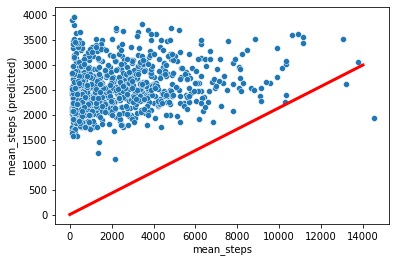

In [172]:
sns.scatterplot(x=df_subset["mean_steps"], y=df_subset["mean_steps_p"])
plt.plot([0, 14000], [0, 3000], color='red', lw=3)
plt.xlabel("mean_steps")
plt.ylabel("mean_steps (predicted)")
plt.show()

<h3>Wat hebben we uiteindelijk ondent? De verschillende variablen hebben geen verband met elkaar. Maar het viel me wel op dat de variablen: "age" het grootste verband heeft met mean_steps</h3>
<h3>De enige variablenen die een soort van verband hebben zijn weight en height. Wat waarschijnlijk komt doordat hoe langer je bent hoe meer je weegt.</h3>